In [1]:
# Importing all necessary libraries
%load_ext autoreload
%autoreload 2

# internal packages
import os
from collections import Counter, OrderedDict

# external packages
import torch
import torchvision
import numpy as np
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import normalized_mutual_info_score
from sklearn.decomposition import PCA
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# util functions
from util.util import *

# dataset functions
from dataset import load_util

# autoencoder
from models.autoencoder.conv_ae import ConvAE
from models.simclr.simclr import *
from models.simclr.transforms import *

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
print("Versions:")
print(f"torch: {torch.__version__}")
print(f"torchvision: {torchvision.__version__}")
print(f"numpy: {np.__version__}",)
print(f"scikit-learn: {sklearn.__version__}")

device = detect_device()
print("Using device: ", device)

Versions:
torch: 1.7.1+cu110
torchvision: 0.8.2+cu110
numpy: 1.19.5
scikit-learn: 0.24.1
Using device:  cuda


In [4]:
# specify learning params
batch_size = 264
learning_rate = 1e-3
epochs = 150

# training

train = True

# load datasets and create dataloaders
data, testdata = load_util.load_cifar('./data', download=True, for_model='SimCLR')
data_percent = 0.4

Files already downloaded and verified


### Plotting images from trainloader

In [86]:
data = load_util.load_custom_cifar('./data', download=True, data_percent=data_percent, for_model='RotNet')
trainloader = torch.utils.data.DataLoader(data,
                                          batch_size=6,
                                          shuffle=True,
                                          drop_last=True)

Files already downloaded and verified


In [84]:
len(data)

80000

<class 'torch.Tensor'>
tensor([2, 1, 1, 2, 0, 2])


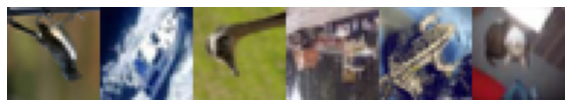

______________________________________________________________________
<class 'torch.Tensor'>
tensor([3, 2, 3, 0, 1, 2])


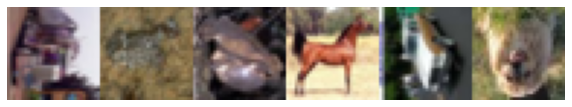

______________________________________________________________________
<class 'torch.Tensor'>
tensor([1, 3, 1, 1, 3, 2])


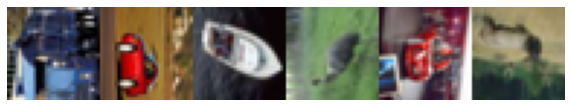

______________________________________________________________________
<class 'torch.Tensor'>
tensor([1, 2, 1, 2, 1, 1])


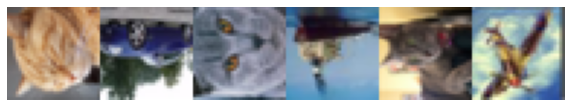

______________________________________________________________________
<class 'torch.Tensor'>
tensor([3, 2, 3, 2, 0, 1])


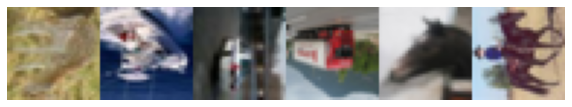

______________________________________________________________________


In [85]:
i = 1
for step, (x, label) in enumerate(trainloader):
    print(type(x))
    print(label)
    plot_images(x, nrow=6)
    print('______________________________________________________________________')
    
    i += 1
    if (i > 5):
        break